In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
from sklearn.neighbors import KNeighborsClassifier

In [2]:
n = 5
C1 = scipy.stats.norm.rvs(loc = (0.4,0), size=(n,2))
C1L = np.ones((n,1)) * 1
C2 = scipy.stats.norm.rvs(loc = (-0.4,0), size=(n,2))
C2L = np.ones((n,1)) * 2
C = np.hstack( [ np.vstack([C1, C2]), np.vstack([C1L, C2L]) ] )
X = C[:,0:2]
Y = C[:,2]

In [3]:
C.shape

(10, 3)

In [4]:
C[0:3]

array([[ 0.1772291 ,  1.02204085,  1.        ],
       [-1.47583771,  0.59326113,  1.        ],
       [ 1.10294736, -2.30243962,  1.        ]])

(array([5., 0., 0., 0., 0., 0., 0., 0., 0., 5.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 10 artists>)

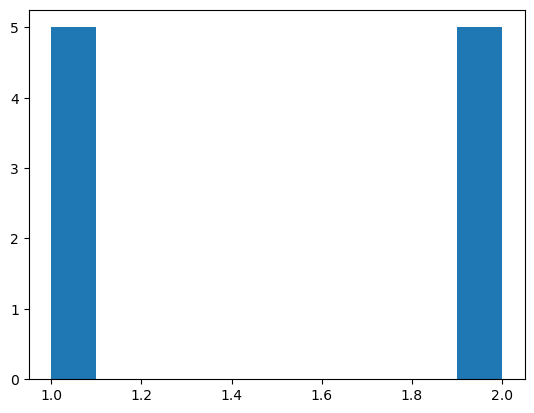

In [5]:
plt.hist(Y)

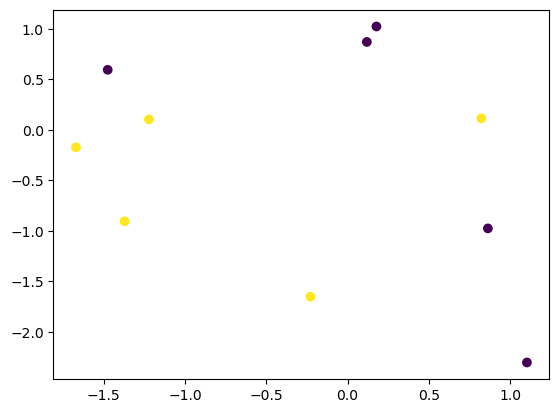

In [6]:
plt.scatter(C[:,0], C[:,1], c=C[:,2])

In [7]:
fit3 = KNeighborsClassifier(n_neighbors=3).fit(X, Y)  # default n=5

In [9]:
dir(fit3)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_algorithm_metric',
 '_check_n_features',
 '_estimator_type',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_param_names',
 '_get_tags',
 '_kneighbors_reduce_func',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tree',
 '_validate_data',
 '_y',
 'algorithm',
 'classes_',
 'effective_metric_',
 'effective_metric_params_',
 'fit',
 'get_params',
 'kneighbors',
 'kneighbors_graph',
 'leaf_size',
 'metric',
 'metric_params',
 'n_features_in_',
 'n_jobs',
 'n_neighbors',
 'n_samples_fit_',
 'outputs_2d_',
 'p'

In [9]:
fit3.predict(X), Y

(array([1., 2., 1., 1., 2., 2., 2., 2., 1., 2.]),
 array([1., 1., 1., 1., 1., 2., 2., 2., 2., 2.]))

In [10]:
%%time 
# Slightly higher-resolution grid with 40,000 points: 
xgrid = np.linspace(-3, 3,200) # range for flipper length
ygrid = np.linspace(-3,3,200)  # range for beak length
xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")
z = np.zeros(xax.shape)
print(xax.shape, yax.shape, z.shape)
for i in range(len(xgrid)):
    for j in range(len(ygrid)):
        x = np.array([xgrid[i], ygrid[j]])
       # print(x)
        z[i,j]= fit3.predict(x[np.newaxis,:])

(200, 200) (200, 200) (200, 200)
CPU times: user 42.2 s, sys: 2.02 s, total: 44.2 s
Wall time: 54.5 s


In [11]:
z[0]  # These are rows in the rectangular grid, so it's ok if 
# all the values are the same at first...

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [ ]:
z.shape

In [14]:
c = [colorsnum[i] for i in z.reshape(-1)]
len(c)

NameError: name 'colorsnum' is not defined

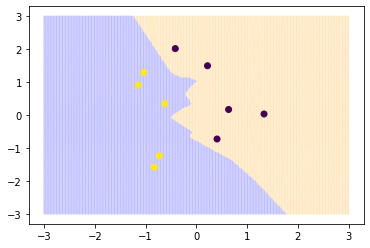

In [15]:
colorsnum = { 2 : "blue", 1: "orange"} 
c = [colorsnum[i] for i in z.reshape(-1)]
plt.scatter(xax,yax, color=c, alpha=0.3, s=0.1)
plt.scatter(X[:,0], X[:,1], c = Y )


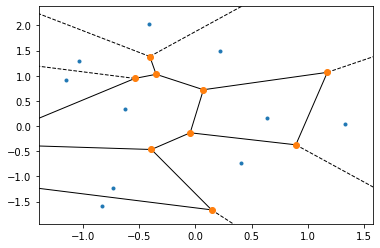

In [16]:
from scipy.spatial import Voronoi, voronoi_plot_2d
points = X[:,0:2]
vor = Voronoi(points)
fig = voronoi_plot_2d(vor)
plt.show(fig)

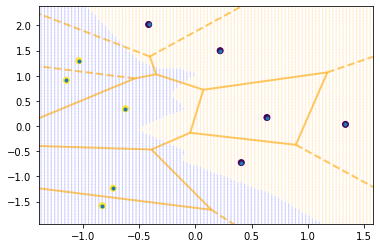

In [17]:
colorsnum = { 2 : "blue", 1: "orange"} 
c = [colorsnum[i] for i in z.reshape(-1)]
vor = Voronoi(points)
voronoi_plot_2d(vor, line_colors='orange',
                line_width=2, line_alpha=0.6, show_vertices=False)

plt.scatter(xax,yax, color=c, alpha=0.3, s=0.1)
plt.scatter(X[:,0], X[:,1], c = Y )


In [18]:
fit1 = KNeighborsClassifier(n_neighbors=1).fit(X, Y)  # default n=5

In [19]:
%%time 
# Slightly higher-resolution grid with 40,000 points: 
xgrid = np.linspace(-3, 3,200) # range for flipper length
ygrid = np.linspace(-3,3,200)  # range for beak length
xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")
z = np.zeros(xax.shape)
print(xax.shape, yax.shape, z.shape)
for i in range(len(xgrid)):
    for j in range(len(ygrid)):
        x = np.array([xgrid[i], ygrid[j]])
       # print(x)
        z[i,j]= fit1.predict(x[np.newaxis,:])

(200, 200) (200, 200) (200, 200)
CPU times: user 45.2 s, sys: 2.11 s, total: 47.3 s
Wall time: 1min 16s


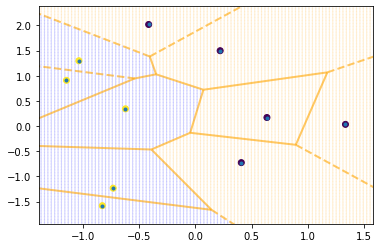

In [20]:
colorsnum = { 2 : "blue", 1: "orange"} 
c = [colorsnum[i] for i in z.reshape(-1)]
vor = Voronoi(points)
voronoi_plot_2d(vor, line_colors='orange',
                line_width=2, line_alpha=0.6, show_vertices=False)

plt.scatter(xax,yax, color=c, alpha=0.3, s=0.1)
plt.scatter(X[:,0], X[:,1], c = Y )

In [ ]:
# Hmm.  Why don't the cells match.. ? ?? 

In [ ]:
fit1 = KNeighborsClassifier(n_neighbors=1).fit(X, Y)  # default n=5

In [ ]:
%%time 
# Slightly higher-resolution grid with 40,000 points: 
xgrid = np.linspace(-3, 3,200) # range for flipper length
ygrid = np.linspace(-3,3,200)  # range for beak length
xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")
z = np.zeros(xax.shape)
print(xax.shape, yax.shape, z.shape)
for i in range(len(xgrid)):
    for j in range(len(ygrid)):
        x = np.array([xgrid[i], ygrid[j]])
       # print(x)
        z[i,j]= fit1.predict(x[np.newaxis,:])

In [ ]:
colorsnum = { 2 : "blue", 1: "orange"} 
c = [colorsnum[i] for i in z.reshape(-1)]
vor = Voronoi(points)
voronoi_plot_2d(vor, line_colors='orange',
                line_width=2, line_alpha=0.6, show_vertices=False)

plt.scatter(xax,yax, color=c, alpha=0.3, s=0.1)
plt.scatter(X[:,0], X[:,1], c = Y )

In [22]:
n = 100
C1 = scipy.stats.norm.rvs(loc = (0.4,0), size=(n,2))
C1L = np.ones((n,1)) * 1
C2 = scipy.stats.norm.rvs(loc = (-0.4,0), size=(n,2))
C2L = np.ones((n,1)) * 2
C = np.hstack( [ np.vstack([C1, C2]), np.vstack([C1L, C2L]) ] )
X = C[:,0:2]
Y = C[:,2]

In [23]:
fit5big = KNeighborsClassifier(n_neighbors=5).fit(X, Y)  # default n=5

In [24]:
%%time 
# Slightly higher-resolution grid with 40,000 points: 
xgrid = np.linspace(-3, 3,100) # range for flipper length
ygrid = np.linspace(-3,3,100)  # range for beak length
xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")
z = np.zeros(xax.shape)
print(xax.shape, yax.shape, z.shape)
for i in range(len(xgrid)):
    for j in range(len(ygrid)):
        x = np.array([xgrid[i], ygrid[j]])
       # print(x)
        z[i,j]= fit5big.predict(x[np.newaxis,:])

(100, 100) (100, 100) (100, 100)
CPU times: user 10.4 s, sys: 432 ms, total: 10.8 s
Wall time: 15.7 s


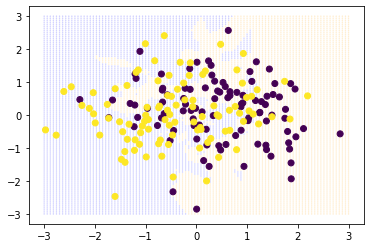

In [25]:
colorsnum = { 2 : "blue", 1: "orange"} 
c = [colorsnum[i] for i in z.reshape(-1)]

plt.scatter(xax,yax, color=c, alpha=0.3, s=0.1)
plt.scatter(X[:,0], X[:,1], c = Y )

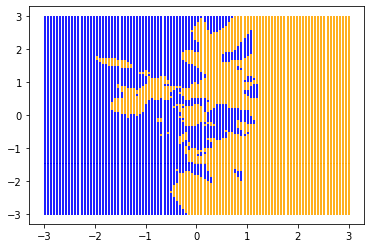

In [26]:
plt.scatter(xax,yax, color=c, alpha=0.9, s=1, marker="s")


In [ ]:
# This looks like a map of some fantastic location.